In [9]:
#!pip install seaborn
#!pip install wordcloud

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [10]:
df = pd.read_csv("../data/01_raw/USvideos.csv")
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [11]:
df["description"] = df["description"].fillna(value="")

In [12]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80
std,7.57,7394113.76,228885.34,29029.71,37430.49
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00
50%,24.00,681861.00,18091.00,631.00,1856.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


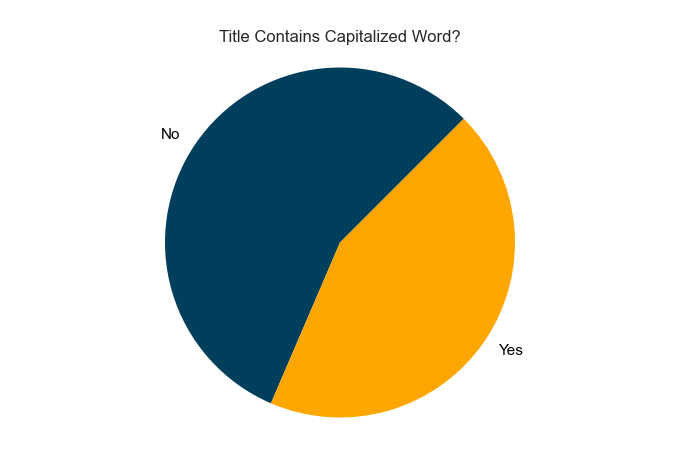

In [13]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

[11/12/22 17:10:38] WARNING  C:\Users\filip\AppData\Local\Temp\ipykernel_3680\2709487885.py:4:      ]8;id=549177;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=132594;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               _ = sns.distplot(df["title_length"], kde=False, rug=False,                          
                                                                                                                   

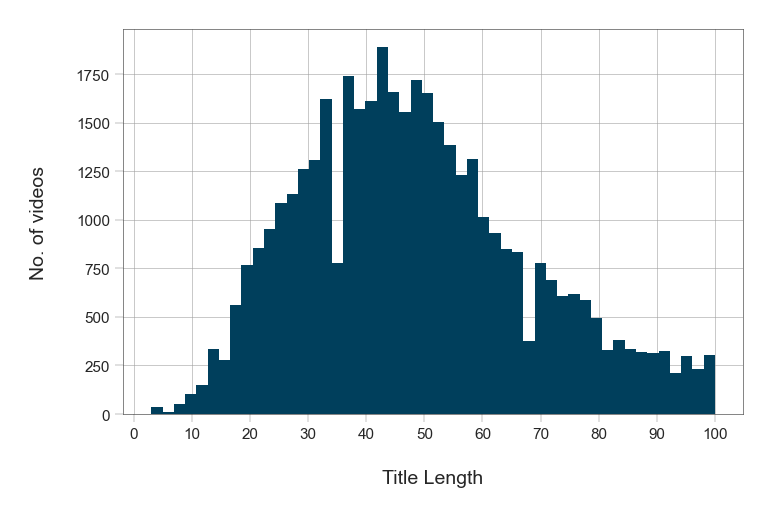

In [14]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

                    WARNING  C:\Users\filip\AppData\Local\Temp\ipykernel_3680\3405909479.py:5:      ]8;id=255726;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=343172;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             FutureWarning: The default value of numeric_only in DataFrame.corr is                 
                             deprecated. In a future version, it will default to False. Select only                
                             valid columns or specify the value of numeric_only to silence this                    
                             warning.                                                                              
                               _ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels,                        
                             yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)                
                                                                                                                   

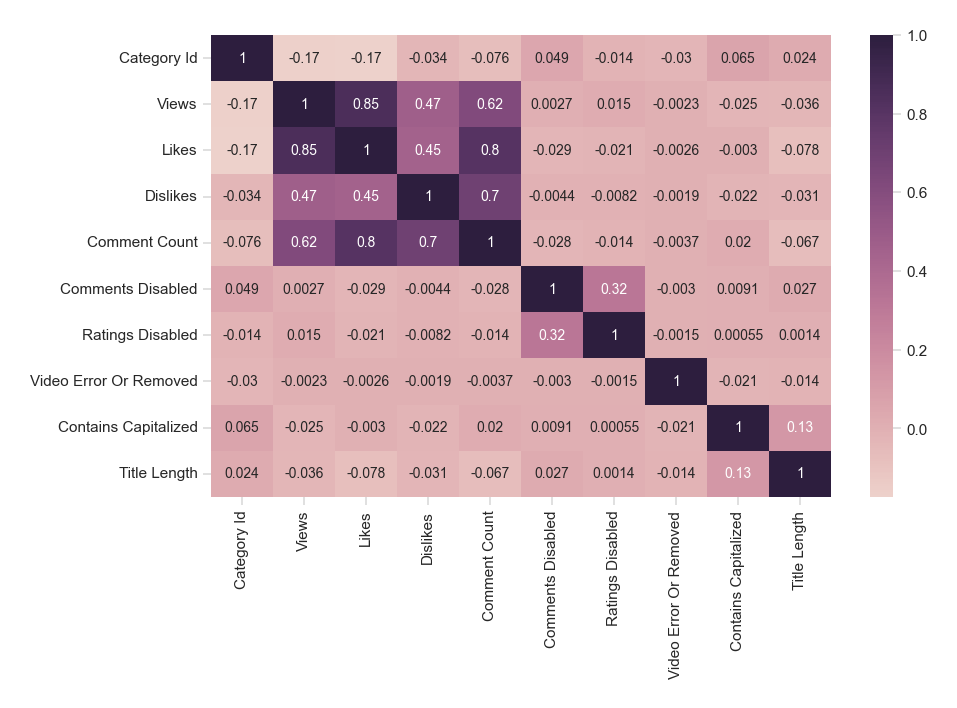

In [15]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

[11/12/22 17:10:39] WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=14465;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=11821;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=593233;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=382059;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=571308;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=653820;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=795195;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=204680;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=762384;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=71084;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=458144;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=458996;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=661700;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=614481;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=13965;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=64709;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=374141;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=470306;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=173558;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=820247;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=268069;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=602714;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=567305;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=56332;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=761742;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=350917;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=338400;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=501478;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

[11/12/22 17:10:40] WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=143185;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=460949;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=263679;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=949485;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=283205;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=872693;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=827690;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=934401;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=873078;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=819242;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=431361;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=247908;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=140478;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=935753;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=699679;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=165672;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=603281;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=256255;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=143531;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=638084;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=661829;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=493933;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=532811;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=84656;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=592465;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=868596;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=241845;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=760303;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=851421;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=175688;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=163258;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=51351;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=440747;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=81677;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=206140;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=261790;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=243105;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=96218;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=221000;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=361326;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=853411;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=130916;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=712418;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=482033;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=229872;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=232613;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=671056;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=66180;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=933115;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=595130;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=745550;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=382251;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=358281;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=573990;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=600819;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=935440;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=167859;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=343870;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=43566;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=681746;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=799247;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=634308;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=360143;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=393828;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=896983;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=702092;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=489363;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=23413;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=698331;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=93618;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=504667;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=138386;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=159798;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=303542;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=242353;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=455610;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=756836;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=762867;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=772849;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=822380;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=408245;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=353354;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=956790;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=992126;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=496055;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=766794;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=538415;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=158137;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=959750;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=951169;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=35727;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=639141;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=441030;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=364555;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=472819;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=719868;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=460944;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=70586;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=30914;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=380219;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=759223;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=749452;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=327413;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=549478;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=479006;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=612061;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=648257;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=739088;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=280808;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=986800;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=859831;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=583636;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=800550;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=418695;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=735390;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=981347;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=644756;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=101582;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=955178;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=423738;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=393060;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=675119;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=366339;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=590321;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=632889;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=933208;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=391978;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=122217;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=467057;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=396064;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=930157;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=848595;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=781144;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=329755;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=738789;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=374781;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=331557;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=478310;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=526332;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=992204;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=964796;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=194585;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=914893;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=134248;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=843550;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=965147;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=474017;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=818109;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=255776;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=129448;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=489166;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=593981;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=467342;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=965516;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=488725;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=600976;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=531268;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=248164;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=888441;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=969824;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=982349;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=460118;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=53582;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=475802;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=888703;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=418248;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=640103;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=815528;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=618919;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=564207;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=756649;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=225909;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=674240;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=869007;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=237321;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=64366;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=45077;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=186259;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=172599;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=551650;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=900212;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=216524;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=157658;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=979289;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=89514;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=626789;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=706305;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=812771;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=938697;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=264612;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=563644;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=680898;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=229995;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=650109;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=551297;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=695437;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=932677;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=37361;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=513643;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=969649;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=593718;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=431697;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=872027;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=683843;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=856488;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=273043;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=304869;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=876242;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=712119;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=639179;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=889030;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=547219;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=968767;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=335770;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=906965;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=232377;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=3232;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=843765;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=571603;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=609312;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=394561;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=492219;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=298907;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=568283;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=251896;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=833583;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=983124;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=272407;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=558999;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=800053;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=421042;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=782316;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=963467;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=754549;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=444713;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=699413;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=4844;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=415979;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=777773;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=424213;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=977446;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=537791;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=874730;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=389076;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=729658;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=955195;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=948660;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=337074;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=574698;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=399033;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=907190;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=898082;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=493416;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=258204;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=843538;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=670388;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=588099;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=29440;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=565474;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=785586;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=195022;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=108309;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=337716;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=259168;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=240957;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=573974;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=371796;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=763262;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=887817;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=506105;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=168567;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=18802;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=936861;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=439430;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=523560;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=284964;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=28032;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=937407;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=614825;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=33717;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=105858;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=88334;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=962100;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=846873;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=556098;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=513529;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=201229;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=281046;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=877889;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=795406;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=902198;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=878075;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=781151;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=479102;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=929322;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=305575;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=64318;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=705463;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=635144;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=642617;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=383479;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=215978;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=902036;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=299117;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=588705;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=470886;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=80686;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=801997;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=414451;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=928169;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=930338;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=376005;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=794340;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=464433;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=890872;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=70416;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=107903;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=318443;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=663812;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=80677;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=796845;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=830566;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=701674;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=758550;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=42241;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=548785;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=51322;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=449917;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=624446;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=678010;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=604451;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=497601;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=430857;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=380242;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=683111;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=70297;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=407411;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=602212;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=32931;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=808535;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=302448;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=310626;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=735154;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=922380;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=677276;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=564039;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=661135;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=827685;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=254363;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=612916;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=449838;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=733143;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=312211;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=357782;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=636238;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=867395;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=503861;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=714885;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=132699;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=74242;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=216105;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=630339;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=856708;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=770899;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=861339;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=788416;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=486570;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=662277;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=242774;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=167608;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=252944;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=841124;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=418526;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=214211;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=213651;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=617093;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=891619;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=204556;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=955298;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=344193;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=518084;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=793060;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=265773;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=27910;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=12922;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=819235;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=306481;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=30176;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=772213;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=517796;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=547032;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=811617;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=674186;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=337714;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=383323;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=702124;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=53444;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=104701;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=381869;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=655884;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=317056;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=675701;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=337143;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=455765;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=110276;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=285248;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=937926;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=328530;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=54532;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=882742;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=545595;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=595067;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=718817;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=981236;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=124708;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=363294;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=19138;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=56536;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=970700;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=316450;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=779827;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=544786;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=271175;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=785373;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=805612;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=38794;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=155049;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=4673;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=792944;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=43240;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=195679;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=492673;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=395294;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=97629;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=831391;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=400590;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=534138;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=524709;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=496050;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=925388;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=519199;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=896556;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=498331;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=629077;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=852890;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=911493;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=159450;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=541318;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=260607;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=31731;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=425870;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=446555;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=454731;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=652432;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=561562;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=791964;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=662874;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=555090;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=63312;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=576593;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=641096;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=343275;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=710030;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=405512;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=291111;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=3313;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=932390;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=405994;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=476278;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=736440;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=791267;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=230965;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=956023;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=641545;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=829190;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=127326;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=553932;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=962088;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=852198;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=240173;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=710488;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=176073;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=820760;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=15460;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=531088;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=628163;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=489435;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=556856;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=637911;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=841857;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=474942;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=243424;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=834701;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=333256;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=805545;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=983423;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=770373;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=444273;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=749237;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=640836;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               Image.ROTATE_90)                                                                    
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=57378;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=603387;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=722493;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=609901;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=745310;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=749756;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=976248;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=559776;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=617303;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=730946;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=634208;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=593743;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=42465;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=780250;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=18941;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=448548;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=918466;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=961964;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=565347;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=397002;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=470110;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=953226;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=923104;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=74791;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=974187;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=515583;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=151078;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=303268;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=443614;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=291706;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=759005;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=162310;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=905472;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=903896;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=957624;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=219620;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=290649;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=833493;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=142143;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=865370;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=95735;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=305782;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=288527;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=971960;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=221579;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=933055;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=485458;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=551449;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=413205;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=451504;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=61188;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=861840;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=868211;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=736746;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=588029;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=387189;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=322133;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=828917;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=865805;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=246271;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=216621;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=87725;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=753177;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=980218;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=306421;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=97359;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=128083;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=305470;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=74514;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=918105;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=253675;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=983404;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

[11/12/22 17:10:41] WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=497051;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=782049;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=996642;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=308091;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=208509;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=820220;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=118001;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=798624;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=19698;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=348079;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=977133;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=424475;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=818743;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=58375;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=251305;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=487585;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=615752;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=407643;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=219583;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=65224;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=899578;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=683676;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=544569;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=920746;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=382400;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=796555;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=183062;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=237208;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=519822;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=809194;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=918942;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=447645;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=299115;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=514826;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=241818;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=818085;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=977185;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=203606;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=591201;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=178346;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=175354;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=394627;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=238762;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=583807;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=71138;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=872162;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=511799;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=875023;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=358895;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=213011;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=747945;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=397428;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=481461;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=260381;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=279154;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=445766;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=327059;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=53979;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=996450;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=834702;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=713680;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=289136;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=180971;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=876882;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=652737;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=665814;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=677048;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=984489;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=708931;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=611609;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=358643;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=994359;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=655973;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=146069;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=166233;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=907786;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=491239;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=289245;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=641659;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=786941;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=142874;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=862250;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=326708;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=591026;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=660735;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=472708;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=667366;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=232231;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=954877;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=697107;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=474993;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=959008;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=566649;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=134329;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=830218;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=377471;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=94460;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=372270;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=489369;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=502300;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=185352;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=269728;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=318640;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=566248;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=624823;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=567023;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=571688;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=460294;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=82621;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=25625;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=374740;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=262553;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=804529;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=327443;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=938719;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=970032;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=229601;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=463772;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=834475;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=352705;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=584350;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=827396;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=762786;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=988324;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=344769;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=253127;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=998848;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=268962;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=444883;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=487091;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=343326;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=559153;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=807096;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=143125;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=707315;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=596251;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=551120;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=572189;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=8892;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=486200;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=618426;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=81818;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=680166;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=34821;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=483198;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=186653;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=91792;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=653590;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=551158;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=318750;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=982793;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=293946;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=974726;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=450439;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=4870;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=98036;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=790619;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=281267;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=756843;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=466273;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=152183;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=817474;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=367133;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=850884;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=472039;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=247464;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=667394;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=650283;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=241864;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=968725;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=68725;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=887764;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=438842;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=772468;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=329168;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=20073;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=487913;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=580029;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=265489;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=948680;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=383220;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=707962;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=710253;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=938595;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=971280;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=162072;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=306035;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=115993;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=131997;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=338425;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=398261;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=397805;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=62594;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=332828;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=464970;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=812239;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=515321;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=983809;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=43690;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=758141;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=2185;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=935951;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=5757;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=697430;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=579483;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=711166;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=855986;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=182053;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=37891;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=454300;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=163731;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=450671;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=256677;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=122782;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=623407;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=300034;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=846521;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=913145;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=477595;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=703688;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=504386;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=537217;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=503040;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=947317;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=934721;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=682152;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=733236;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=872261;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=313493;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=966985;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=198336;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=955493;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=596298;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=800013;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=283984;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=681977;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=250139;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=420010;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=727274;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=345115;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=779256;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=880747;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=370424;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=55949;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=634214;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=456434;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=551279;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=20802;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=488762;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=911041;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=987810;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=683796;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               Image.ROTATE_90)                                                                    
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=437340;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=276777;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=261048;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=847766;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=990749;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=559377;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=221189;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=351074;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=433339;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=889694;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=201496;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=701653;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=628483;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=281091;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=214189;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=634873;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=633879;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=856658;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=257179;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=598286;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=45994;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=501278;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=505670;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=713106;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=449063;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=685444;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=136765;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=4850;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=976392;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=234262;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=988151;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=141267;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=305695;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=305880;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=512313;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=282972;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=119996;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=515439;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=591310;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=55953;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=324889;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=482792;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=101305;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=951967;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=198261;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=124550;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=213985;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=112602;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=960363;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=885833;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=946399;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=396149;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=56201;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=80534;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=411207;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=141176;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=679896;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=857403;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=716002;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=731099;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=13407;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=622549;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=136541;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=170965;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=233726;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=339239;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=909698;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=220121;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=894893;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=674492;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=286787;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=997395;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=209237;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=785662;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=724150;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=602007;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=220559;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=949949;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=181210;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=150909;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=618053;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=102156;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=710613;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=40027;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=418388;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=606294;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=57049;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=523681;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               Image.ROTATE_90)                                                                    
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=138582;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=126819;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=464232;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=653330;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=871774;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=479884;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=736278;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=359233;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=344995;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=391478;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=194875;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=705277;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=705543;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=189492;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=812923;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=767250;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=63220;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=553921;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=339443;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=553937;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=682886;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=412488;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=794734;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=666083;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=835293;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=737154;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=837001;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=682610;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=66817;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=946164;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=831102;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=984599;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=725310;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=871875;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=112262;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=800581;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=16719;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=712097;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=894719;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=440873;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=647686;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=233159;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=492794;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=800739;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=362721;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=397862;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=301660;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=682200;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=348606;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=148283;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=149251;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=808176;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=247176;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=105680;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=109628;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=714033;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=834904;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=546284;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=134001;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=166202;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=602977;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=568278;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

[11/12/22 17:10:42] WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=500159;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=838341;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=493132;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=274588;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=746030;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=5146;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=310312;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=321537;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=761043;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=592877;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=411043;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=656350;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=811929;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=421224;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=292274;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=462698;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=158363;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=950418;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=177028;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=132558;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=214060;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=810081;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=47058;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=312376;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=105038;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=123291;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=218802;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=37473;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=201002;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=117999;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=873921;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=802277;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=269462;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=280220;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=688963;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=543115;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=718993;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=557849;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=327247;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=531684;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=64708;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=921929;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=895714;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=870794;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=127662;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=220974;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=407353;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=504074;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=963914;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=441511;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=867630;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=162919;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=483926;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=679868;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=395004;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=264496;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=633581;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=272026;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=816489;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=776790;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=601914;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=35212;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=458557;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=576523;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=30350;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=724513;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=366762;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=145234;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=345720;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=738273;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=517624;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=846011;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=650126;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=712987;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=439552;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=858601;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=250533;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=979437;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=317591;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=819692;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=35951;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=60116;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=477281;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=263443;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=163250;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=590158;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=122662;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=726372;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=405074;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=223391;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=162450;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=825640;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=342568;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=209421;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=62125;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=542389;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=339950;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=464127;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=209577;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=463971;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=318980;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=770377;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=811452;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=370609;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=439156;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=57040;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=281933;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=44503;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=608527;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=567628;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=693718;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=274759;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=956147;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=56635;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=877169;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=522037;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=984408;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=191603;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=4308;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=542057;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=387131;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=807132;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=950933;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=733778;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=955726;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=408329;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=144292;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=7409;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=952357;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=823035;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=784845;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=851240;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=652279;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=547213;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=296347;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=250862;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=151378;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=145308;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=39986;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=901188;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=196451;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=14537;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=848568;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=846237;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=225217;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=227680;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=601735;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=880487;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=851308;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=806257;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=677051;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=14455;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=286943;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=206679;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=840410;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=341826;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=305892;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=119798;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=236367;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=41360;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=413950;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=387465;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=533568;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=319843;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=9179;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=189995;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=817576;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=459796;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=610293;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=750914;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=599235;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=748639;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=352452;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=907540;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=983701;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=597596;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=529219;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=683508;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=121320;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=496606;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=62373;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=901655;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=918354;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=456509;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=1215;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=827836;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=89657;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=137072;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=44409;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=936526;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=320650;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=897478;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=217464;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=637649;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=720588;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=464441;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=457845;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=14570;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=614450;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=234571;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=199561;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=689343;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=453009;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=536530;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=140998;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=340470;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=706498;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=944001;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=658004;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=410370;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=135683;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=548948;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=512774;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=301645;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=697543;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=933871;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=874195;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=696188;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=524936;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=154571;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=431765;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=709846;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=434379;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=549661;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=683862;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=301243;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=779290;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=345223;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=874137;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=670474;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=645217;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=752954;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=423711;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=333862;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=667314;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=3291;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=77278;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=513947;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = Image.ROTATE_90                                                       
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=6419;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=991446;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=299154;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=610371;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=478961;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=621216;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=181562;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=54703;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=583651;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=488317;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=93375;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=921790;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=533593;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=668814;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=634872;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=916423;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=350250;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=220177;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=165419;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=263825;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=666105;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=373436;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=89372;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=104211;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=139531;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=610052;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=933716;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=303424;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=259443;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=399322;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=248441;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=987346;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=475676;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=656838;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=588838;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=633607;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=338531;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=544636;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=883037;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=973015;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=100122;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=116517;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed                
                             in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.                           
                               orientation = (Image.ROTATE_90 if orientation is None else                          
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=418075;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=304633;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=649351;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=947572;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=935617;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=823640;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=57177;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=52998;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=951682;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=919604;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=326488;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=708607;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=599433;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=456979;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=657541;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=248887;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=329407;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=734403;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=799079;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=422675;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=370589;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=593012;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=252698;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=695834;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=452909;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=757483;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

                    WARNING  C:\Users\filip\.conda\envs\asi\lib\site-packages\wordcloud\wordcloud.p ]8;id=265062;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py\warnings.py]8;;\:]8;id=118554;file://C:\Users\filip\.conda\envs\asi\lib\warnings.py#109\109]8;;\
                             y:508: DeprecationWarning: textsize is deprecated and will be removed                 
                             in Pillow 10 (2023-07-01). Use textbbox or textlength instead.                        
                               box_size = draw.textsize(word, font=transposed_font)                                
                                                                                                                   

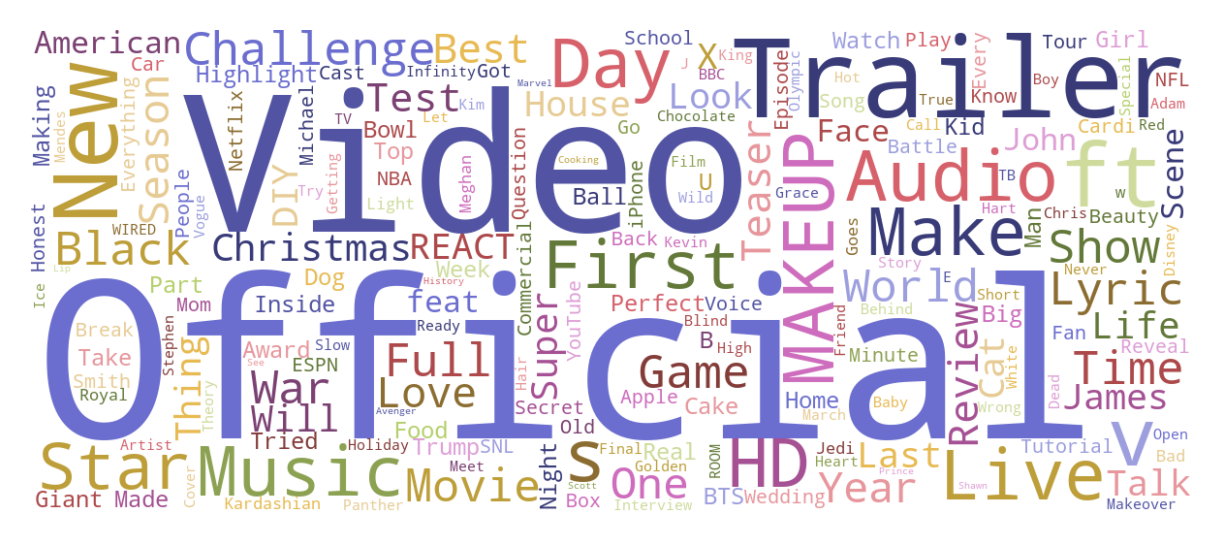

In [16]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")